In [1]:
# python数据清洗
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [16]:
df = pd.DataFrame(np.random.randn(6,4),columns=['col1','col2','col3','col4'])
df.iloc[1:3,1] = np.nan
df.iloc[4,3] = np.nan
df

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
1,0.226278,NaN,0.435515,-0.523313
2,-0.795767,NaN,-1.268783,1.347730
3,0.671146,1.579792,1.240822,-1.115669
4,1.437447,0.958851,-0.254783,NaN
5,-0.670509,-0.111642,-0.140697,-0.470979


In [15]:
# 查看是否有缺失值
np.any(pd.isnull(df))
df.isnull()

,col1,col2,col3,col4
0,False,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,True
5,False,False,False,False


In [9]:
pd.isnull(df)

,col1,col2,col3,col4
0,False,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,True
5,False,False,False,False


In [13]:
# 查看哪些列有缺失值
# 查看含有NA的列
na_col = df.isnull().any() 
# 查看所有含有NA的列
na_col2 = df.isnull().all()
print(na_col)
print(na_col2)

col1    False
col2     True
col3    False
col4     True
dtype: bool
col1    False
col2    False
col3    False
col4    False
dtype: bool


In [19]:
# 删除缺失值
df.dropna()

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
3,0.671146,1.579792,1.240822,-1.115669
5,-0.670509,-0.111642,-0.140697,-0.470979


In [21]:
# 使用sklearn填充缺失值
# 将nan的缺失值以均值做替换，有缺失值按每一列的平均值替换
nan_model = SimpleImputer(missing_values=np.NAN,strategy='mean') 
nan_model_rst = nan_model.fit_transform(df)

In [22]:
nan_model_rst

array([[ 1.54766955,  1.78603623, -0.1050789 ,  1.35636707],
       [ 0.22627788,  1.05325916,  0.43551468, -0.52331277],
       [-0.79576703,  1.05325916, -1.26878277,  1.34772994],
       [ 0.67114608,  1.57979194,  1.24082202, -1.11566933],
       [ 1.43744716,  0.95885084, -0.25478339,  0.11882717],
       [-0.67050913, -0.11164238, -0.14069724, -0.47097905]])

In [25]:
df.mean()

col1    0.402711
col2    1.053259
col3   -0.015501
col4    0.118827
dtype: float64

In [26]:
df

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
1,0.226278,NaN,0.435515,-0.523313
2,-0.795767,NaN,-1.268783,1.347730
3,0.671146,1.579792,1.240822,-1.115669
4,1.437447,0.958851,-0.254783,NaN
5,-0.670509,-0.111642,-0.140697,-0.470979


In [27]:
# 用后面的值替换缺失值
df.fillna(method="backfill")

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
1,0.226278,1.579792,0.435515,-0.523313
2,-0.795767,1.579792,-1.268783,1.347730
3,0.671146,1.579792,1.240822,-1.115669
4,1.437447,0.958851,-0.254783,-0.470979
5,-0.670509,-0.111642,-0.140697,-0.470979


In [28]:
# 用前面的值替换
df.fillna(method="pad")

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
1,0.226278,1.786036,0.435515,-0.523313
2,-0.795767,1.786036,-1.268783,1.347730
3,0.671146,1.579792,1.240822,-1.115669
4,1.437447,0.958851,-0.254783,-1.115669
5,-0.670509,-0.111642,-0.140697,-0.470979


In [29]:
# 用0 值替换
df.fillna(0)

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
1,0.226278,0.000000,0.435515,-0.523313
2,-0.795767,0.000000,-1.268783,1.347730
3,0.671146,1.579792,1.240822,-1.115669
4,1.437447,0.958851,-0.254783,0.000000
5,-0.670509,-0.111642,-0.140697,-0.470979


In [30]:
# 不同列用不同值替换
df.fillna({"col2":1.1,"col4":1.2})

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
1,0.226278,1.100000,0.435515,-0.523313
2,-0.795767,1.100000,-1.268783,1.347730
3,0.671146,1.579792,1.240822,-1.115669
4,1.437447,0.958851,-0.254783,1.200000
5,-0.670509,-0.111642,-0.140697,-0.470979


In [33]:
# 使用平均值替换
df.fillna(df.mean())

,col1,col2,col3,col4
0,1.547670,1.786036,-0.105079,1.356367
1,0.226278,1.053259,0.435515,-0.523313
2,-0.795767,1.053259,-1.268783,1.347730
3,0.671146,1.579792,1.240822,-1.115669
4,1.437447,0.958851,-0.254783,0.118827
5,-0.670509,-0.111642,-0.140697,-0.470979


In [ ]:
array([[ 1.54766955,  1.78603623, -0.1050789 ,  1.35636707],
       [ 0.22627788,  1.05325916,  0.43551468, -0.52331277],
       [-0.79576703,  1.05325916, -1.26878277,  1.34772994],
       [ 0.67114608,  1.57979194,  1.24082202, -1.11566933],
       [ 1.43744716,  0.95885084, -0.25478339,  0.11882717],
       [-0.67050913, -0.11164238, -0.14069724, -0.47097905]])

In [39]:
# 异常值处理
import pandas as pd
# 生成异常数据
df = pd.DataFrame({'col1': [1, 120, 3, 5, 2, 12, 13],
                   'col2': [12, 17, 31, 53, 22, 32, 43]})
df  # 打印输出

,col1,col2
0,1,12
1,120,17
2,3,31
3,5,53
4,2,22
5,12,32
6,13,43


In [40]:
df_zcore = df.copy()

In [42]:
# 判断异常值的方法。Z-score
# 计算公式 Z = X-μ/σ 其中μ为总体平均值，X-μ为离均差，σ表示标准差。z的绝对值表示在标准差范围内的原始分数与总体均值之间的距离。当原始分数低于平均值时，z为负，以上为正。
cols = df_zcore.columns
for col in cols:
    df_col = df[col]
    z_score = (df_col-df_col.mean())/df_col.std()
    # 2.2为经验值
    df_zcore[col]=z_score.abs()>2.2

In [43]:
df_zcore

,col1,col2
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


In [45]:
# 删除异常值所在的行
df_zcore.drop(1)

,col1,col2
0,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


In [47]:
# 重复值的处理
# 生成重复的数据
data1,data2,data3,data4=['a',3],['b',2],['a',3],['c',2]
df = pd.DataFrame(data=[data1,data2,data3,data4],columns=['col1','col2'])
df

,col1,col2
0,a,3
1,b,2
2,a,3
3,c,2


In [48]:
# 判断是否有重复值
df.duplicated()

0    False
1    False
2     True
3    False
dtype: bool

In [49]:
# 删除重复的值
df.drop_duplicates()

,col1,col2
0,a,3
1,b,2
3,c,2


In [50]:
# 删除数据记录中col1值相同的记录
print(df.drop_duplicates(['col1']))

  col1  col2
0    a     3
1    b     2
3    c     2


## 数值型数据的处理
- 标准化&归一化

```
数据标准化是一个常用的数据预处理操作，目的是处理不同规模和量纲的数据，使其缩放到相同的数据区间和范围，以减少规模、特征、分布差异等对模型的影响。

标准化（Z-Score）

Z-Score标准化是基于原始数据的均值和标准差进行的标准化，假设原转换的数据为x，新数据为x′，那么x'=(x-mean)/std，其中mean和std为x所在列的均值和标准差。
这种方法适合大多数类型的数据，也是很多工具的默认标准化方法。标准化之后的数据是以0为均值，方差为1的正态分布。但是Z-Score方法是一种中心化方法，会改变原有数据的分布结构，不适合对稀疏数据做处理。
归一化（Max-Min）

Max-Min标准化方法是对原始数据进行线性变换，假设原转换的数据为x，新数据为x′，那么x'=(x-min)/(max-min)，其中min和max为x所在列的最小值和最大值。
这种标准化方法的应用非常广泛，得到的数据会完全落入[0，1]区间内（Z-Score则没有类似区间）。这种方法能使数据归一化而落到一定的区间内，同时还能较好地保持原有数据结构。
代码
```

In [75]:
# 标准化（z_score）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
data = np.loadtxt("./data/data6.txt",delimiter='\t')
data

array([[ 8.9 , 10.4 ],
       [ 7.76,  4.68],
       [ 7.54,  3.84],
       ...,
       [ 2.26,  5.14],
       [ 2.17,  3.54],
       [ 1.95,  3.81]])

In [76]:
# 标准化
zscore = StandardScaler()
data_scale1 = zscore.fit_transform(data)

In [77]:
# 归一化
zscore = MinMaxScaler()
data_scale2= zscore.fit_transform(data)

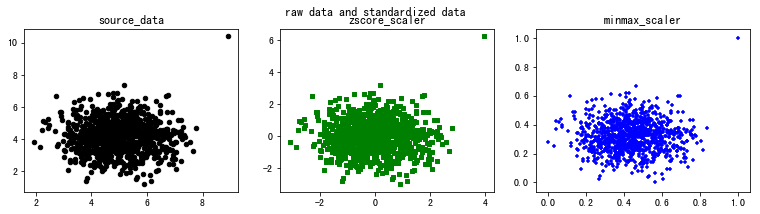

In [80]:
# 创建数据集列表
data_list = [data,data_scale1,data_scale2]
# 创建颜色列表
color_list = ['black','green','blue']
# 创建样式列表
merker_list = ['o',',','+']
# 创建标题列表
title_list=['source_data','zscore_scaler','minmax_scaler']
plt.figure(figsize=(13,3))
for i,data_single in enumerate(data_list):
    # 确定子网格
    plt.subplot(1,3,i+1)
    # x值，y值，s 指定点的大小，marker点样式，c 颜色
    plt.title(title_list[i])
    plt.scatter(data_single[:,:-1],data_single[:,-1],s=20,marker=merker_list[i],c=color_list[i])
    plt.title(title_list[i])
    plt.suptitle("raw data and standardized data")  # 设置总标题


## 数据离散化

In [114]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# 读取数据
df = pd.read_table('data/data7.txt',names=['id', 'amount', 'income', 'datetime', 'age'])
df.head()

,id,amount,income,datetime,age
0,15093,1390,10.40,2017-04-30 19:24:13,0-10
1,15062,4024,4.68,2017-04-27 22:44:59,70-80
2,15028,6359,3.84,2017-04-27 10:07:55,40-50
3,15012,7759,3.70,2017-04-04 07:28:18,30-40
4,15021,331,4.25,2017-04-08 11:14:00,70-80


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
id          100 non-null int64
amount      100 non-null int64
income      100 non-null float64
datetime    100 non-null object
age         100 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


In [116]:
df.describe()

,id,amount,income
count,100.000000,100.000000,100.000000
mean,15053.850000,3983.220000,4.105900
std,29.431439,2302.857349,1.195348
min,15002.000000,176.000000,1.210000
25%,15028.750000,2050.000000,3.295000
50%,15057.500000,3944.500000,4.210000
75%,15080.000000,5980.250000,4.610000
max,15100.000000,7952.000000,10.400000


In [117]:
df.shape

(100, 5)

In [118]:
df.head()

,id,amount,income,datetime,age
0,15093,1390,10.40,2017-04-30 19:24:13,0-10
1,15062,4024,4.68,2017-04-27 22:44:59,70-80
2,15028,6359,3.84,2017-04-27 10:07:55,40-50
3,15012,7759,3.70,2017-04-04 07:28:18,30-40
4,15021,331,4.25,2017-04-08 11:14:00,70-80


In [119]:
# 针对时间数据的离散化
# 将时间转化为datatime格式
df['datetime'] = list(map((pd.to_datetime),df['datetime']))
df.head()

,id,amount,income,datetime,age
0,15093,1390,10.40,2017-04-30 19:24:13,0-10
1,15062,4024,4.68,2017-04-27 22:44:59,70-80
2,15028,6359,3.84,2017-04-27 10:07:55,40-50
3,15012,7759,3.70,2017-04-04 07:28:18,30-40
4,15021,331,4.25,2017-04-08 11:14:00,70-80


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
id          100 non-null int64
amount      100 non-null int64
income      100 non-null float64
datetime    100 non-null datetime64[ns]
age         100 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ KB


In [121]:
df['weekday'] = [i.weekday() for i in df['datetime']]

In [122]:
df.head()

,id,amount,income,datetime,age,weekday
0,15093,1390,10.40,2017-04-30 19:24:13,0-10,6
1,15062,4024,4.68,2017-04-27 22:44:59,70-80,3
2,15028,6359,3.84,2017-04-27 10:07:55,40-50,3
3,15012,7759,3.70,2017-04-04 07:28:18,30-40,1
4,15021,331,4.25,2017-04-08 11:14:00,70-80,5


In [123]:
# 自定义封箱边界离散化
# 自定义区间边界
bins = [0,20,100,500,10000]
# 使用边界做离散化
df['amount1'] = pd.cut(df['amount'],bins)
df.head()

,id,amount,income,datetime,age,weekday,amount1
0,15093,1390,10.40,2017-04-30 19:24:13,0-10,6,"(500, 10000]"
1,15062,4024,4.68,2017-04-27 22:44:59,70-80,3,"(500, 10000]"
2,15028,6359,3.84,2017-04-27 10:07:55,40-50,3,"(500, 10000]"
3,15012,7759,3.70,2017-04-04 07:28:18,30-40,1,"(500, 10000]"
4,15021,331,4.25,2017-04-08 11:14:00,70-80,5,"(100, 500]"


In [124]:
# 针对连续数据的离散化：使用聚类法实现离散化
data = df['amount']
# 转换数据的形状
data_reshape = data.values.reshape((data.shape[0],1))
data_reshape

array([[1390],
       [4024],
       [6359],
       [7759],
       [ 331],
       [4669],
       [1088],
       [ 602],
       [5532],
       [5350],
       [3946],
       [6630],
       [ 176],
       [1970],
       [7952],
       [ 199],
       [ 784],
       [3614],
       [4083],
       [ 826],
       [3502],
       [5566],
       [4401],
       [5287],
       [3654],
       [ 503],
       [6681],
       [1925],
       [7614],
       [4810],
       [7503],
       [1668],
       [6710],
       [5013],
       [3457],
       [ 914],
       [3219],
       [2732],
       [1124],
       [5151],
       [7880],
       [4524],
       [5928],
       [6215],
       [3680],
       [2062],
       [2539],
       [2067],
       [5294],
       [4149],
       [ 256],
       [5381],
       [3591],
       [4202],
       [2477],
       [3153],
       [6776],
       [5893],
       [4294],
       [1741],
       [2385],
       [5762],
       [7238],
       [4555],
       [6526],
       [ 581],
       [36

In [125]:
# 创建kmeans模型并制定要聚类数量
model_kmeans = KMeans(n_clusters=4,random_state=0)
# 创建模型聚类
keames_result = model_kmeans.fit_predict(data_reshape)
# 新离散化的数据合并到元数据
df['amount2'] = keames_result
df.head()

,id,amount,income,datetime,age,weekday,amount1,amount2
0,15093,1390,10.40,2017-04-30 19:24:13,0-10,6,"(500, 10000]",0
1,15062,4024,4.68,2017-04-27 22:44:59,70-80,3,"(500, 10000]",2
2,15028,6359,3.84,2017-04-27 10:07:55,40-50,3,"(500, 10000]",3
3,15012,7759,3.70,2017-04-04 07:28:18,30-40,1,"(500, 10000]",3
4,15021,331,4.25,2017-04-08 11:14:00,70-80,5,"(100, 500]",0


In [126]:
# 针对连续数据的离散化
df['amount3'] = pd.qcut(df['amount'], 4, labels=['bad', 'medium', 'good', 'awesome']) 
df = df.drop('amount', 1)  # 丢弃名为amount的列
df.head(5)  # 打印输出前5条数据

,id,income,datetime,age,weekday,amount1,amount2,amount3
0,15093,10.40,2017-04-30 19:24:13,0-10,6,"(500, 10000]",0,bad
1,15062,4.68,2017-04-27 22:44:59,70-80,3,"(500, 10000]",2,good
2,15028,3.84,2017-04-27 10:07:55,40-50,3,"(500, 10000]",3,awesome
3,15012,3.70,2017-04-04 07:28:18,30-40,1,"(500, 10000]",3,awesome
4,15021,4.25,2017-04-08 11:14:00,70-80,5,"(100, 500]",0,bad


In [129]:
from sklearn.preprocessing import Binarizer
# 针对连续数据的二值化
binarizer_scaler = Binarizer(threshold=df['income'].mean())  # 建立Binarizer模型对象
income_tmp = binarizer_scaler.fit_transform(df[['income']])  # Binarizer标准化转换
income_tmp.resize(df['income'].shape)  # 转换数据形状
df['income'] = income_tmp  # Binarizer标准化转换
df.head(5)  # 打印输出前5条数据  

,id,income,datetime,age,weekday,amount1,amount2,amount3
0,15093,1.0,2017-04-30 19:24:13,0-10,6,"(500, 10000]",0,bad
1,15062,1.0,2017-04-27 22:44:59,70-80,3,"(500, 10000]",2,good
2,15028,0.0,2017-04-27 10:07:55,40-50,3,"(500, 10000]",3,awesome
3,15012,0.0,2017-04-04 07:28:18,30-40,1,"(500, 10000]",3,awesome
4,15021,1.0,2017-04-08 11:14:00,70-80,5,"(100, 500]",0,bad


In [ ]:
# 分类数据的处理 one-hot编码

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'id': [3566841, 6541227, 3512441],
                   'sex': ['male', 'Female', 'Female'],
                   'level': ['high', 'low', 'middle'],
                   'score': [1, 2, 3]})
df

,id,sex,level,score
0,3566841,male,high,1
1,6541227,Female,low,2
2,3512441,Female,middle,3


In [3]:
id_data = df[['id']]
# 制定要转换的列
raw_convert_data = df.iloc[:,1:]
raw_convert_data

,sex,level,score
0,male,high,1
1,Female,low,2
2,Female,middle,3


In [4]:
model_enc = OneHotEncoder()
df_new2 = model_enc.fit_transform(raw_convert_data).toarray()
df_all = pd.concat((id_data,pd.DataFrame(df_new2)),axis=1)
df_all

,id,0,1,2,3,4,5,6,7
0,3566841,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,6541227,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3512441,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
df

,id,sex,level,score
0,3566841,male,high,1
1,6541227,Female,low,2
2,3512441,Female,middle,3


In [6]:
# 使用pandas的get_dummuies ,词方法只会对非数值类型的数据做转换
df_new3 = pd.get_dummies(raw_convert_data)
df_all2 = pd.concat((id_data, df_new3), axis=1)  # 重新组合为数据框
print(df_all2)  # 打印输出转换后的数据框

        id  score  sex_Female  sex_male  level_high  level_low  level_middle
0  3566841      1           0         1           1          0             0
1  6541227      2           1         0           0          1             0
2  3512441      3           1         0           0          0             1


In [30]:
import pandas as pd
car_sales = pd.read_csv('./data/car_data.csv')
car_sales.head()

,date_t,cnt
0,2012-12-31,NaN
1,2013-01-01,NaN
2,2013-01-02,68.0
3,2013-01-03,36.0
4,2013-01-04,5565.0


In [31]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 2 columns):
date_t    1512 non-null object
cnt       1032 non-null float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


In [32]:
car_sales.describe()

,cnt
count,1032.000000
mean,1760.124031
std,1153.164214
min,12.000000
25%,1178.750000
50%,1774.000000
75%,2277.750000
max,7226.000000


In [33]:
car_sales['date_t'] = pd.to_datetime(car_sales['date_t'])

In [34]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 2 columns):
date_t    1512 non-null datetime64[ns]
cnt       1032 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB


In [35]:
car_sales.head()

,date_t,cnt
0,2012-12-31,NaN
1,2013-01-01,NaN
2,2013-01-02,68.0
3,2013-01-03,36.0
4,2013-01-04,5565.0


In [36]:
# 取出关键的时间信息
# 取出几月份
car_sales.loc[:,'month']=car_sales['date_t'].dt.month
# 取出来是几号
car_sales.loc[:,'dom'] = car_sales['date_t'].dt.day
# 取出一年当中的第几天
car_sales.loc[:,'doy'] = car_sales['date_t'].dt.dayofyear
# 取出星期几
car_sales.loc[:,'dow'] = car_sales['date_t'].dt.dayofweek
car_sales.head()

,date_t,cnt,month,dom,doy,dow
0,2012-12-31,NaN,12,31,366,0
1,2013-01-01,NaN,1,1,1,1
2,2013-01-02,68.0,1,2,2,2
3,2013-01-03,36.0,1,3,3,3
4,2013-01-04,5565.0,1,4,4,4
